# FOTD Model Fit Example

Fit some high order Model to a FOTD System

In [1]:
# General Pacakages
import sympy as sp
import numpy as np
import control as cn
#Plotting
#import bokeh.plotting as bk
#import bokeh.io as bi
#from bokeh.io import export_svgs
#bi.output_notebook()

import matplotlib.pyplot as plt
%matplotlib inline

# Algorithms
import Algorithms as alg
from Algorithms import TUBScolorscale, cm2in

# Plot width and heigth in cm
plot_width = 19.
plot_height = 7.5

In [88]:
## Generate a High Order System
num = [[[1]]]
den = [[[1,1.8,0.9]]]
G = cn.tf(num,den)
G = G*G
t = np.linspace(0,20,2000)
y, t = cn.step(G,t)
u = np.ones_like(t)
# Identify the parameter
K,T,L = alg.Integral_Identification(y,u,t)
num, den = cn.pade(L,10)
GM = cn.tf([K],[T,1])*cn.tf(num,den)
yM,tM = cn.step(GM,t)

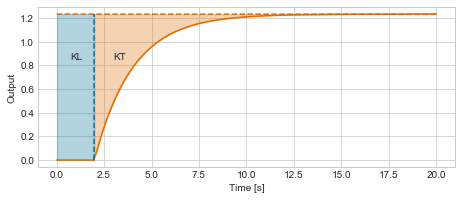

In [35]:
# Matplotlib plot
plt.rcParams['svg.fonttype'] = 'none'
plt.style.use('seaborn-whitegrid')

# Steady state
yM[np.where(tM<L)] = np.zeros_like(yM[np.where(tM<L)])
yss = yM[-1]*np.ones_like(tM)
ltime = L*np.ones(2)
ytime = np.array([0,yM[-1]])
plt.clf()
fig, ax = plt.subplots(1,figsize = cm2in(plot_width,plot_height))
#ax.plot(t,y, label= "Original")
ax.plot(tM,yM, color = TUBScolorscale[3])
ax.plot(tM,yss, color = TUBScolorscale[3], linestyle = "dashed")
ax.plot(ltime,ytime,color = TUBScolorscale[9],linestyle="dashed")
ax.fill_between(tM[np.where(tM<L)],yM[np.where(tM<L)],yss[np.where(tM<L)], alpha = 0.3, color = TUBScolorscale[9])
ax.fill_between(tM[np.where(tM>L)],yM[np.where(tM>L)],yss[np.where(tM>L)], alpha = 0.3, color = TUBScolorscale[3])
ax.set_ylabel("Output")
ax.annotate('KL',
           xy = (1.25,0.85),xycoords = "data",
           xytext = (.7,0.85))
ax.annotate('KT',
           xy = (4,0.85),xycoords = "data",
           xytext = (3,0.85))
ax.set_xlabel("Time [s]")
plt.savefig("../Latex/Graphics/FOTD_Area.svg")
plt.show()

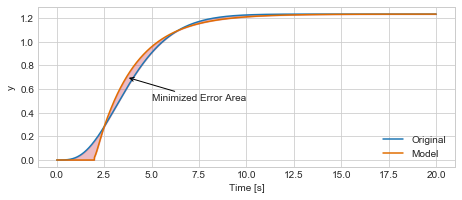

In [34]:
# Matplotlib plot
plt.rcParams['svg.fonttype'] = 'none'
plt.style.use('seaborn-whitegrid')

plt.clf
fig, ax = plt.subplots(1,figsize = cm2in(plot_width,plot_height))
ax.plot(t,y, label= "Original")
ax.plot(tM,yM,color = TUBScolorscale[3], label = "Model")
ax.fill_between(t,y,yM, color = TUBScolorscale[1], alpha = .3)
ax.annotate('Minimized Error Area',
           xy = (3.7,0.7),xycoords = "data",
           xytext = (5.0,0.5), arrowprops=dict(arrowstyle="->"))
ax.set_ylabel("y")
plt.legend(loc="lower right")
ax.set_xlabel("Time [s]")
plt.savefig("../Latex/Graphics/FOTD_Identification_Error.svg")

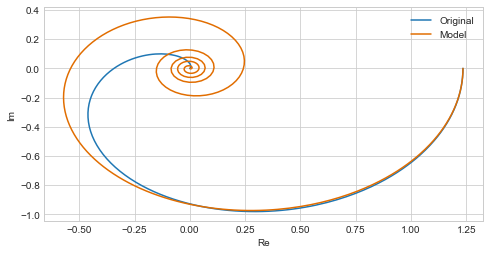

In [89]:
w = np.logspace(-5,5,1000)

real1,imag1,omega1 = cn.nyquist_plot(G,w)
real2,imag2,omega2 = cn.nyquist_plot(GM,w)

# Make a plot
plt.rcParams['svg.fonttype'] = 'none'
plt.style.use('seaborn-whitegrid')

plt.clf()
fig1, ax1 = plt.subplots(1,figsize = cm2in(20,10))
# Gain
ax1.plot(real1,imag1, label= "Original")
ax1.plot(real2,imag2 ,color = TUBScolorscale[3], label = "Model")
ax1.set_ylabel("Im")
plt.legend(loc="upper right")
ax1.set_xlabel("Re")
plt.savefig("../Latex/Graphics/Example_Nyquist_Plot.svg")
plt.show()

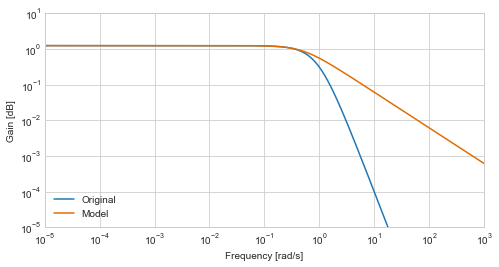

In [90]:
w = np.logspace(-5,5,1000)
mag1,phase1,omega1 = cn.bode(G,w)
mag2,phase2,omega2 = cn.bode(GM,w)

# Make a plot
plt.rcParams['svg.fonttype'] = 'none'
plt.style.use('seaborn-whitegrid')

plt.clf()
fig1, ax1 = plt.subplots(1,figsize = cm2in(20,10))
# Gain
ax1.plot(omega1,mag1, label= "Original")
ax1.plot(omega2,mag2 ,color = TUBScolorscale[3], label = "Model")
ax1.set_ylabel("Gain [dB]")
plt.legend(loc="lower left")
ax1.set_xlabel("Frequency [rad/s]")
ax1.set_xlim(1e-5,1e3)
ax1.set_ylim(1e-5,10)
ax1.loglog()
plt.savefig("../Latex/Graphics/Example_Bode_Gain.svg")

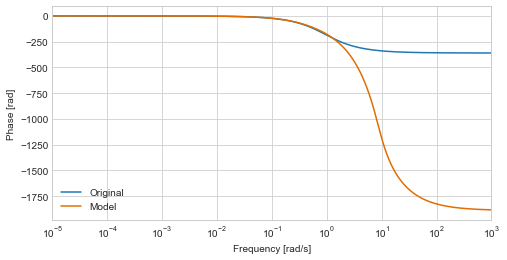

In [91]:
plt.clf()
fig2, ax2 = plt.subplots(1,figsize = cm2in(20,10))
# Phase
ax2.semilogx(omega1,phase1, label= "Original")
ax2.semilogx(omega2,phase2 ,color = TUBScolorscale[3], label = "Model")
ax2.set_ylabel("Phase [rad]")
plt.legend(loc="lower left")
ax2.set_xlabel("Frequency [rad/s]")
ax2.set_xlim(1e-5,1e3)
#plt.show()
plt.savefig("../Latex/Graphics/Example_Bode_Phase.svg")

# Define the figure
p3 = bk.figure(plot_width = 800, plot_height = 300, x_axis_type="log", y_axis_type="log")

# Define the Data
p3.line(omega2,mag2, line_color=TUBScolorscale[2], line_width = 2, legend="Model")
p3.line(omega1,mag1, line_color=TUBScolorscale[6], line_width = 2, line_dash = "dashed",legend="Original")
# Define the axis label
p3.xaxis.axis_label = "Frequency [rad/s]"
p3.yaxis.axis_label = "Gain [dB]"

# Define the figure
p4 = bk.figure(plot_width = 800, plot_height = 300, x_axis_type="log", y_range = [-360,0])
# Define the Data
p4.line(omega2[np.where(phase2>-360)],phase2[np.where(phase2>-360)], line_color=TUBScolorscale[2], line_width = 2, legend="Model")
p4.line(omega1,phase1, line_color=TUBScolorscale[6], line_width = 2, line_dash = "dashed",legend="Original")
# Define the axis label
p4.xaxis.axis_label = "Frequency [rad/s]"
p4.yaxis.axis_label = "Phase [rad]"


c1 = bk.gridplot([[p3],[p4]])
# Show and Export
p3.output_backend = "svg"
p4.output_backend = "svg"

export_svgs(p3, filename="Area_Bode_Gain.svg")
export_svgs(p4, filename="Area_Bode_Phase.svg")

bk.show(c1)

# Define the figure
p5 = bk.figure(plot_width = 800, plot_height = 300, x_axis_type="log", y_axis_type="log")
# Define the Data
p5.line(omega2[np.where(mag2>mag1)],mag2[np.where(mag2>mag1)], line_color=TUBScolorscale[2], line_width = 2, legend="Robust")
p5.line(omega2[np.where(mag2<mag1)],mag2[np.where(mag2<mag1)], line_color=TUBScolorscale[0], line_width = 2, legend="Robust")
p5.line(omega1,mag1, line_color=TUBScolorscale[6], line_width = 2, line_dash = "dashed",legend="Original")
# Define the axis label
p5.xaxis.axis_label = "Frequency [rad/s]"
p5.yaxis.axis_label = "Gain [dB]"


# Define the figure
p6 = bk.figure(plot_width = 800, plot_height = 300, x_axis_type="log", y_range = [-360,0])
# Define the Data
p6.line(omega2[np.where(phase2<phase1)],phase2[np.where(phase2<phase1)], line_color=TUBScolorscale[2], line_width = 2, legend="Robust")
p6.line(omega2[np.where(phase2>phase1)],phase2[np.where(phase2> phase1)], line_color=TUBScolorscale[0], line_width = 2, legend="Not Robust")
p6.line(omega1,phase1, line_color=TUBScolorscale[6], line_width = 2, line_dash = "dashed",legend="Original")
# Define the axis label
p6.xaxis.axis_label = "Frequency [rad/s]"
p6.yaxis.axis_label = "Phase [rad]"


c1 = bk.gridplot([[p5],[p6]])
# Show and Export
p5.output_backend = "svg"
p6.output_backend = "svg"

#export_svgs(p3, filename="Area_Bode_Gain.svg")
#export_svgs(p4, filename="Area_Bode_Phase.svg")

bk.show(c1)

0.783029912481


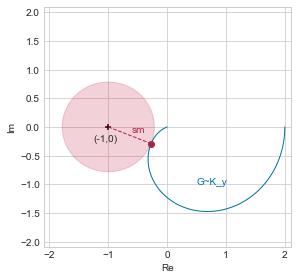

In [92]:
import matplotlib.pyplot as plt
import numpy as np
import control as cn
from Algorithms import TUBScolorscale, cm2in

w = np.logspace(-5,5,1000)

# Compute the open loop
G = cn.tf([.1,1],[10,5,1])*(cn.tf([2],[1]))
real1,imag1,omega1 = cn.nyquist(G,w)

# Compute the Sensitivity
S = 1/(1+G)
mag,phase,omega = cn.bode(S,w)

# Get the maximum of sensitivity
max_w = np.argmax(mag)

# Get the value of SM
sm = 1/mag[max_w]
print(sm)
# Matplotlib plot
plt.rcParams['svg.fonttype'] = 'none'
plt.style.use('seaborn-whitegrid')

plt.clf()
#plt.axes().set_aspect('equal')
fig, ax = plt.subplots(figsize = cm2in(1.5*plot_height,1.5*plot_height))
ax.plot(real1,imag1, color = TUBScolorscale[9], linewidth = 1, label = "Open Loop")
circle1 = plt.Circle((-1, 0), 1, color=TUBScolorscale[1], alpha=0.5)
#ax.add_artist(circle1)
circle2 = plt.Circle((-1,0), sm, color='white')
#ax.add_artist(circle2)
circle3 = plt.Circle((-1,0), sm, color=TUBScolorscale[1], alpha = 0.2)
ax.add_artist(circle3)
ax.plot([-1,real1[max_w]],[0,imag1[max_w]], color = TUBScolorscale[1], linestyle='--', linewidth = 1)
ax.scatter(real1[max_w],imag1[max_w],color = TUBScolorscale[1],)
ax.scatter(-1,0,marker='+', color = 'black')
ax.annotate('sm',
           xy = (-0.25,-0.2),xycoords = "data",color = TUBScolorscale[1],
           xytext = (-0.6,-0.1))
ax.annotate('G~K_y',
           xy = (-0.25,-0.2),xycoords = "data",color = TUBScolorscale[9],
           xytext = (0.5,-1))
ax.annotate('(-1,0)',
           xy = (-1.25,-0.25),xycoords = "data",
           xytext = (-1.25,-0.25))
ax.set_xlim(-2.1,2.1)
ax.set_ylim(-2.1,2.1)
ax.set_xlabel('Re')
ax.set_ylabel('Im')
plt.savefig('../Latex/Graphics/Sensitivity_Nyquist.svg')
plt.show()

In [49]:
# Make the Singular Value Decomposition graphics

# Make the Points
x = np.ones(2)
# Make a Matrix
G = lambda w:np.abs(np.array([[(1+0.5j*w)/(10j*w+1),(4+0.01*w**2)/(12j*w+1-0.1*w**2)],[2/(0.1j*w+1-0.1*w**2),3/(7j*w+1)]]))
# Make the Bode Plot
omega = np.logspace(-3,1,1e4)
gain = []
sv = []
for w in omega:
    gain.append(np.dot(G(w),x))
    
    #max_sv = np.max(v)
    #min_sv = np.min(v)
    sv.append(np.linalg.svd(G(w), compute_uv=False))
# Rearrange
gain = np.vstack(gain)
sv = np.vstack(sv)
# Get the maximum singular value
sv_max = np.max(sv[:,0])
# Make an array for plotting
sv_max = sv_max*np.ones_like(omega)
gain

array([[ 4.99966257,  4.99992669],
       [ 4.99966195,  4.99992656],
       [ 4.99966132,  4.99992642],
       ..., 
       [ 0.09258775,  0.26469495],
       [ 0.09256266,  0.26420487],
       [ 0.09253762,  0.26371582]])

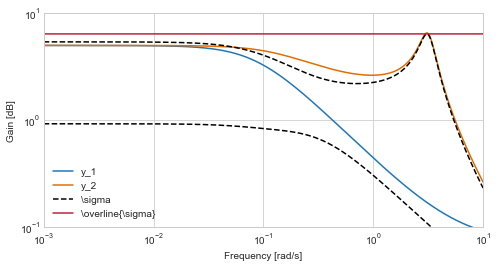

In [56]:
# Make a plot
plt.rcParams['svg.fonttype'] = 'none'
plt.style.use('seaborn-whitegrid')

plt.clf()
fig1, ax1 = plt.subplots(1,figsize = cm2in(20,10))
# Gain
ax1.plot(omega,gain[:,0], label= "y_1")
ax1.plot(omega,gain[:,1],color = TUBScolorscale[3], label = "y_2")
ax1.plot(omega,sv[:,0], linestyle = "dashed", color = TUBScolorscale[0])
ax1.plot(omega,sv[:,1], linestyle = "dashed", color = TUBScolorscale[0], label = "\sigma")
ax1.plot(omega,sv_max, color = TUBScolorscale[1], label = "\overline{\sigma}")
ax1.scatter(-1,0,marker='+', color = 'black')
ax1.set_ylabel("Gain [dB]")
plt.legend(loc="lower left")
ax1.set_xlabel("Frequency [rad/s]")
ax1.set_xlim(1e-3,1e1)
ax1.set_ylim(1e-1,1e1)
ax1.loglog()
plt.savefig("../Latex/Graphics/MaximumSingularValue_Bode.svg")

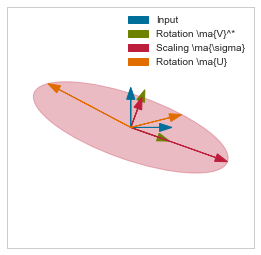

In [93]:
# Make a plot
plt.rcParams['svg.fonttype'] = 'none'
plt.style.use('seaborn-whitegrid')
from matplotlib.patches import Ellipse

# Rotation Matrix
R = lambda phi: np.array([[np.cos(phi), -np.sin(phi)],[np.sin(phi),np.cos(phi)]])
S = lambda sv1,sv2: np.array([[sv1,0],[0,sv2]])

# Angles
phi1 = 20 # Deg
phi2 = -65 # Deg

plt.clf()
fig1, ax1 = plt.subplots(1,figsize = cm2in(1.5*plot_height,1.5*plot_height))
# Scaling Ellipsoid
ell2 = Ellipse((0,0),2.5,0.8,-phi1, color = TUBScolorscale[1], alpha = 0.3)
ell2w = Ellipse((0,0),2.5,0.8,-phi1, color = 'w')
ax1.add_artist(ell2w)
ax1.add_artist(ell2)

# Coordinate Systems
# Get the endpoints
# Rotated Input
u_r = np.dot(R(np.radians(phi1)),np.array([[.5,0],[0,.5]]))
# Scaled, rotated Input
u_rs = np.dot(S(2.5,0.8),u_r)
# Output
y = np.dot(R(np.radians(phi2)),u_rs)
# Input
ax1.arrow(0,0,0,.5, length_includes_head = True, head_width = 0.1, color = TUBScolorscale[9])
a1 = ax1.arrow(0,0,.5,0, length_includes_head = True, head_width = 0.1, color = TUBScolorscale[9], label = 'Input')
# Rotated Input
ax1.arrow(0,0,u_r[0,0],u_r[0,1], length_includes_head = True, head_width = 0.1, color = TUBScolorscale[6])
a2 = ax1.arrow(0,0,u_r[1,0],u_r[1,1], length_includes_head = True, head_width = 0.1, color = TUBScolorscale[6], label = 'Rotated Input')
# Scale rotated Input
ax1.arrow(0,0,u_rs[0,0],u_rs[0,1], length_includes_head = True, head_width = 0.1, color = TUBScolorscale[1])
a3 = ax1.arrow(0,0,u_rs[1,0],u_rs[1,1], length_includes_head = True, head_width = 0.1, color = TUBScolorscale[1], label = 'Scaled rotated Input')
# Output
ax1.arrow(0,0,y[0,0],y[0,1], length_includes_head = True, head_width = 0.1, color = TUBScolorscale[3])
a4 = ax1.arrow(0,0,y[1,0],y[1,1], length_includes_head = True, head_width = 0.1, color = TUBScolorscale[3], label = 'Output')
# Axes Limits
ax1.set_xlim(-1.5,1.5)
ax1.set_ylim(-1.5,1.5)
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(False)
ax1.legend([a1,a2,a3,a4],['Input', 'Rotation \ma{V}^*', 'Scaling \ma{\sigma}', 'Rotation \ma{U}'],loc = "upper right")
plt.savefig("../Latex/Graphics/SingularValueTransform.svg")
plt.show()

# Define the figure
p2 = bk.figure(x_range = [-2.5,4], y_range=[-1.5,1.5], width = 800, height = 400, match_aspect = True,aspect_scale = 1)
#p1.grid.minor_grid_line_color = '#eeeeee'
# Define the Data
#p2.line(real2,imag2, line_color=TUBScolorscale[2], line_width = 2, legend="Model")
p2.ellipse(x = -1,y = 0, width = 2,height =  2, angle = 0, fill_color = TUBScolorscale[0], fill_alpha = 0.5, line_color = None, legend="Nyquist Circle")
p2.ellipse(x = -1,y = 0, width = 2*sm,height =  2*sm, angle = 0, fill_color = 'white', line_color = None)
p2.ellipse(x = -1,y = 0, width = 2*sm,height =2*sm, angle = 0, fill_color = TUBScolorscale[2],fill_alpha = 0.35, line_color = None, legend="sM")
p2.line((-1,real1[max_w]),(0,imag1[max_w]), line_dash = "dashed")
p2.line(real1,imag1, line_color=TUBScolorscale[6], line_width = 2, legend = "Open Loop")
p2.circle(real1[max_w],imag1[max_w], radius = .02, fill_color = "white")
p2.cross(-1,0, color = "black")



# Add the sensitivity
# Define the axis label
p2.xaxis.axis_label = "Re"
p2.yaxis.axis_label = "Im"
p2.legend.location = "top_right"
# Add Label
mytext = Label(x=-1, y=0.1, text='(-1,0)', text_font_size = '10pt')
p2.add_layout(mytext)
# Remove 
p2.toolbar.logo = None
p2.toolbar_location = None
p2.xaxis.major_label_text_font_size = '0pt'  # turn off x-axis tick labels
p2.yaxis.major_label_text_font_size = '0pt'  # turn off y-axis tick labels

#bk.show(p2)

# Show and Export
p2.output_backend = "svg"
export_svgs(p2, filename="Maximum_Sensitivity.svg")

In [339]:
# Make the Singular Value Decomposition graphics

# Make the Points
x = np.ones(2)
# Make a Matrix
G = lambda w:np.abs(np.array([[(1+0.5j*w)/(10j*w+1),(4+0.01*w**2)/(12j*w+1-0.1*w**2)],[2/(0.1j*w+1-0.1*w**2),3/(7j*w+1)]]))
# Make the Bode Plot
omega = np.logspace(-3,1,1e4)
gain = []
sv = []
for w in omega:
    gain.append(np.dot(G(w),x))
    
    #max_sv = np.max(v)
    #min_sv = np.min(v)
    sv.append(np.linalg.svd(G(w), compute_uv=False))
# Rearrange
gain = np.vstack(gain)
sv = np.vstack(sv)
# Get the maximum singular value
sv_max = np.max(sv[:,0])
# Make an array for plotting
sv_max = sv_max*np.ones_like(omega)

# Make a plot
p = bk.figure(x_axis_type = "log", y_axis_type="log", y_range = [0.1,10], width = 500, height = 300)
p.line(omega,gain[:,0], line_color = TUBScolorscale[6], line_width = 2, legend = "Output 1")
p.line(omega,gain[:,1], line_color = TUBScolorscale[2], line_width = 2, legend = "Output 2")
p.line(omega,sv[:,0], line_dash = "dashed", line_color = "black", line_width = 2, legend = "Singular Values")
p.line(omega,sv[:,1], line_dash = "dashed", line_color = "black", line_width = 2)
p.line(omega,sv_max, line_color = TUBScolorscale[0], line_width = 2, legend = "Maximum Singular Value")
p.legend.location = "bottom_left"
# Remove 
p.toolbar.logo = None
p.toolbar_location = None
p.xaxis.major_label_text_font_size = '0pt'  # turn off x-axis tick labels
p.yaxis.major_label_text_font_size = '0pt'  # turn off y-axis tick labels
#bk.show(p)

# Show and Export
p.output_backend = "svg"
export_svgs(p, filename="Bode_Singular_Value.svg")

['Bode_Singular_Value.svg']

In [6]:
# Make an example plot for the ellipsis
from bokeh.models import Arrow, NormalHead
# Rotation Matrix
R = lambda phi: np.array([[np.cos(phi), -np.sin(phi)],[np.sin(phi),np.cos(phi)]])
S = np.diag([.2,0.8])
# Angles
phi1 = np.radians(-30.)
phi2 = np.radians(-50.)
# Create U,V
U = R(phi1)
V = R(phi2)
# Since the matrix is a rep for the axis, use matrix columns
US = np.dot(S,U)
USV = np.dot(V,US)

p = bk.figure(x_range = [-1.1,1.1], y_range=[-1.1,1.1], match_aspect = True, width = 300, height = 300)

p.ellipse(x=0,y=0, width = 0.4, height= 1.6, angle = -phi1, fill_color = TUBScolorscale[0], fill_alpha = 0.3, line_color = None)
p.ellipse(x=0,y=0, width = 0.4, height= 1.6, angle = -phi1, fill_color = None, line_color = TUBScolorscale[0], legend = "Maximum Singular Value", line_dash = "dashed")
# Original axis / Input
p.add_layout(Arrow(end=NormalHead(fill_color="black", size = 10, line_color = "black"),
                   line_color = "black",
                   x_start=0, y_start=0, x_end=1, y_end=0))
p.add_layout(Arrow(end=NormalHead(fill_color="black", size = 10, line_color = "black"),
                   line_color = "black",
                   x_start=0, y_start=0, x_end=0, y_end=1))
# Rotated Inputs
p.add_layout(Arrow(end=NormalHead(fill_color=TUBScolorscale[7], size = 10, line_color = TUBScolorscale[7]),
                   line_color = TUBScolorscale[7],
                   x_start=0, y_start=0, x_end=U[0,0], y_end=U[0,1]))
p.add_layout(Arrow(end=NormalHead(fill_color=TUBScolorscale[7], size = 10, line_color = TUBScolorscale[7]),
                   line_color = TUBScolorscale[7],
                   x_start=0, y_start=0, x_end=U[1,0], y_end=U[1,1]))
# Scaled, Rotated Inputs
p.add_layout(Arrow(end=NormalHead(fill_color=TUBScolorscale[0], size = 10, line_color = TUBScolorscale[0]),
                   line_color = TUBScolorscale[0],
                   x_start=0, y_start=0, x_end=US[0,0], y_end=US[0,1]))
p.add_layout(Arrow(end=NormalHead(fill_color=TUBScolorscale[0], size = 10, line_color = TUBScolorscale[0]),
                   line_color = TUBScolorscale[0],
                   x_start=0, y_start=0, x_end=US[1,0], y_end=US[1,1]))
# Scaled, Rotated Inputs
p.add_layout(Arrow(end=NormalHead(fill_color=TUBScolorscale[2], size = 10, line_color = TUBScolorscale[2]),
                   line_color = TUBScolorscale[2],
                   x_start=0, y_start=0, x_end=USV[0,0], y_end=USV[0,1]))
p.add_layout(Arrow(end=NormalHead(fill_color=TUBScolorscale[2], size = 10, line_color = TUBScolorscale[2]),
                   line_color = TUBScolorscale[2],
                   x_start=0, y_start=0, x_end=USV[1,0], y_end=USV[1,1]))
# Annotation
text1 = (Label(x=0.3, y=-0.15, text='Original Input', text_color = "black"))
text2 = (Label(x=0.3, y=0.55, text='Rotated Input', text_color = TUBScolorscale[7]))
text3 = (Label(x=-0.8, y=0.3, text='Output', text_color = TUBScolorscale[2]))
p.add_layout(text1)
p.add_layout(text2)
p.add_layout(text3)
# Remove 
p.toolbar.logo = None
p.toolbar_location = None
p.axis.visible = False
p.xaxis.major_label_text_font_size = '0pt'  # turn off x-axis tick labels
p.yaxis.major_label_text_font_size = '0pt'  # turn off y-axis tick labels
p.grid.visible = False
p.legend.location = "bottom_left"
#bk.show(p)

# Show and Export
p.output_backend = "svg"
export_svgs(p, filename="Singular_Value_Transform.svg")

['Singular_Value_Transform.svg']